In [1]:
import sys
import os
from math import log
import numpy as np
import scipy as sp
from PIL import Image
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
from keras.applications.vgg16 import VGG16

In [3]:
path_root = 'malimg_data' 

In [4]:
batches = ImageDataGenerator().flow_from_directory(directory=path_root, target_size=(64,64), batch_size=10000)

Found 9339 images belonging to 25 classes.


In [5]:
batches.class_indices

{'Adialer.C': 0,
 'Agent.FYI': 1,
 'Allaple.A': 2,
 'Allaple.L': 3,
 'Alueron.gen!J': 4,
 'Autorun.K': 5,
 'C2LOP.P': 6,
 'C2LOP.gen!g': 7,
 'Dialplatform.B': 8,
 'Dontovo.A': 9,
 'Fakerean': 10,
 'Instantaccess': 11,
 'Lolyda.AA1': 12,
 'Lolyda.AA2': 13,
 'Lolyda.AA3': 14,
 'Lolyda.AT': 15,
 'Malex.gen!J': 16,
 'Obfuscator.AD': 17,
 'Rbot!gen': 18,
 'Skintrim.N': 19,
 'Swizzor.gen!E': 20,
 'Swizzor.gen!I': 21,
 'VB.AT': 22,
 'Wintrim.BX': 23,
 'Yuner.A': 24}

In [6]:
ds, labels = next(batches)

In [7]:
ds.shape

(9339, 64, 64, 3)

In [8]:
labels.shape

(9339, 25)

In [9]:
classes = batches.class_indices.keys()

In [10]:
perc = (sum(labels)/labels.shape[0])*100

<BarContainer object of 25 artists>

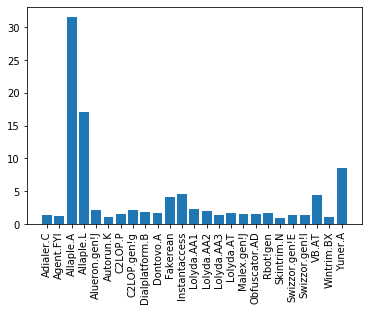

In [11]:
plt.xticks(rotation='vertical')
plt.bar(classes,perc)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ds/255.,labels, test_size=0.3)

In [13]:
X_train.shape

(6537, 64, 64, 3)

In [14]:
X_test.shape

(2802, 64, 64, 3)

In [19]:
conv_base = VGG16(
    weights = 'vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5',
    include_top = False,
    input_shape = (64,64,3)
)

In [20]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [22]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64,activation = 'relu'))
model.add(Dense(25,activation = 'softmax'))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 25)                1625      
                                                                 
Total params: 14,986,841
Trainable params: 272,153
Non-trainable params: 14,714,688
_________________________________________________________________


In [24]:
conv_base.trainable = False

In [28]:
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])


In [29]:
history = model.fit(X_train,y_train,validation_data = (X_test,y_test),epochs = 50)


Epoch 1/50
205/205 [==============================] - 28s 133ms/step - loss: 1.1467 - accuracy: 0.6326 - val_loss: 0.6765 - val_accuracy: 0.7662
Epoch 2/50
205/205 [==============================] - 27s 132ms/step - loss: 0.5784 - accuracy: 0.7895 - val_loss: 0.5259 - val_accuracy: 0.8019
Epoch 3/50
205/205 [==============================] - 27s 132ms/step - loss: 0.4711 - accuracy: 0.8227 - val_loss: 0.4953 - val_accuracy: 0.8044
Epoch 4/50
205/205 [==============================] - 28s 136ms/step - loss: 0.4152 - accuracy: 0.8473 - val_loss: 0.4588 - val_accuracy: 0.8123
Epoch 5/50
205/205 [==============================] - 28s 136ms/step - loss: 0.3809 - accuracy: 0.8600 - val_loss: 0.4266 - val_accuracy: 0.8344
Epoch 6/50
205/205 [==============================] - 28s 135ms/step - loss: 0.3557 - accuracy: 0.8626 - val_loss: 0.3898 - val_accuracy: 0.8512
Epoch 7/50
205/205 [==============================] - 28s 135ms/step - loss: 0.3350 - accuracy: 0.8736 - val_loss: 0.3590 - val_ac

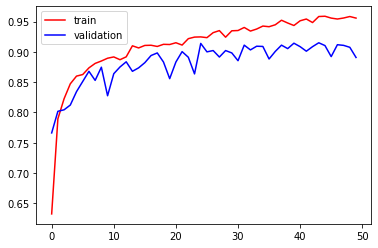

In [30]:
plt.plot(history.history['accuracy'],color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'],color = 'blue', label = 'validation')
plt.legend()
plt.show()

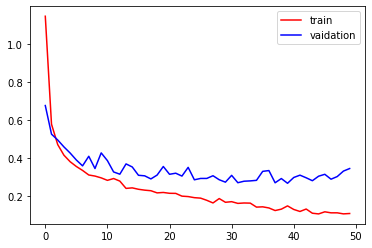

In [31]:
plt.plot(history.history['loss'],color = 'red',label = 'train')
plt.plot(history.history['val_loss'],color = 'blue',label = 'vaidation')
plt.legend()
plt.show()